부산 기온 데이터 수집
부산에서 가장 더웠던 날은?
매년 크리스마스 최고, 최저기온 추이
월별 그래프 그리기

In [12]:

# 부산 기온 데이터 수집
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/busan_20220921111819.csv', header=6,encoding='euc-kr') 


df.head() 


,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1904-08-01,159,26.2,22.7,30.3
1,1904-08-02,159,25.5,23.4,30.2
2,1904-08-03,159,24.9,23.1,29.2
3,1904-08-04,159,23.9,21.9,28.0
4,1904-08-05,159,23.7,21.9,27.5


In [19]:
# 부산에서 가장 더웠던 날은?

df.rename(columns={ '평균기온(℃)':'평균기온',
                    '최저기온(℃)':'최저기온', 
                    '최고기온(℃)':'최고기온'}, inplace= True)
df.dropna(inplace=True)
df.sort_values(by='최고기온', ascending=False) # 정렬해서 행, 렬 지정
print("부산에서 가장 더웠던 날은? {}, {}도".format(df.loc[40921,'날짜'],df.loc[40921,'최고기온']))

부산에서 가장 더웠던 날은? 2016-08-14, 37.3도


In [32]:

# 매년 크리스마스 최고, 최저기온 추이
df['날짜'] = df['날짜'].astype('datetime64')
ch_month=(df['날짜'].dt.month == 12) 
ch_day=(df['날짜'].dt.day == 25 )
df.loc[ch_month&ch_day,['날짜','최고기온','최저기온']]


,날짜,최고기온,최저기온
146,1904-12-25,7.7,-1.5
511,1905-12-25,14.8,10.5
876,1906-12-25,3.8,-4.8
1241,1907-12-25,13.9,5.3
1607,1908-12-25,9.1,-0.6
...,...,...,...
41419,2017-12-25,7.5,0.1
41784,2018-12-25,9.9,0.2
42149,2019-12-25,16.3,5.4
42515,2020-12-25,7.6,0.2


C:\Users\park\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


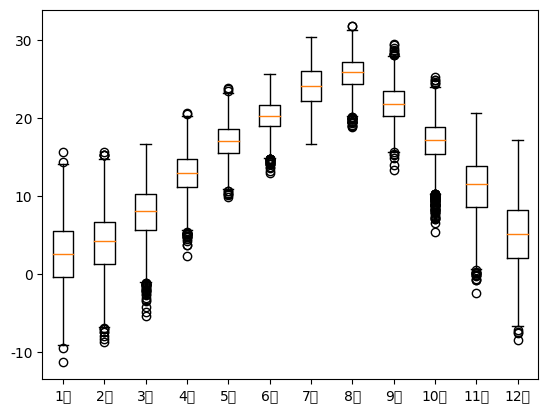

In [45]:
# 월별 그래프 그리기

df['월'] = df['날짜'].dt.month
avg_month = []

for i in range(1,13):
    avg_month.append(df.loc[df['월'] == i,'평균기온'])

x_m_list=[]
for i in range(1,13) :
    

    x_m_list.append(f'{i}월')

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False
plt.boxplot(avg_month)
plt.xticks(range(1,13),x_m_list)



plt.show()